<a href="https://colab.research.google.com/github/narayana05/narayana05-uk_election_2RV_PY.ipynb/blob/main/uk_election_2RV_PY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**list of questions addressed by the interactive visualizations:**

1. **What is the average voter turnout by political party?**
2. **How is the vote share distributed among major political parties?**
3. **What is the relationship between electorate size and voter turnout?**
4. **How do parties compare in terms of seats won, average vote share, and average swing?**
5. **What does the vote swing analysis reveal by party?**
6. **What are the correlations between key variables?**
7. **How can constituencies be clustered based on voting patterns?**
8. **What is the distribution of majority margins by party?**
9. **What does the pyramid chart show regarding majority margins by party?**
10. **What is the focus on moderate majority margins in a triangle bar chart?**


# **Method 1(Electoral Data Analysis)**-
(interactive visualizations):-
**looks at electoral patterns and specific metrics related to voting behavior.**

In [46]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans


**Key Takeaway:**- Integrating data manipulation libraries like Pandas and NumPy with visualization tools like Plotly enhances the analysis and presentation of complex datasets. Using KMeans clustering helps identify patterns in voter behavior, providing deeper insights into electoral dynamics.

In [47]:
def load_and_preprocess_data():
    df = pd.read_csv('/content/ge_2019_constituencies.csv')

    numeric_cols = ['turnout_pct', 'elected_mp_votes', 'valid', 'ge17_majority', 'electorate']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

    df['turnout_pct'].fillna(df['turnout_pct'].mean(), inplace=True)
    df['electorate'].fillna(df['electorate'].mean(), inplace=True)
    df.drop_duplicates(inplace=True)

    df['vote_share'] = (df['elected_mp_votes'] / df['valid']) * 100
    df['swing'] = df['elected_mp_votes'] - df['ge17_majority']

    return df

# Load the data
df = load_and_preprocess_data()
#print(df.head())  # Check the DataFrame

<ipython-input-47-ab789e5c0dd5>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-47-ab789e5c0dd5>:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

 **Key Takeaway:-** The preprocessing pipeline not only cleans and prepares the dataset for analysis but also generates critical insights into voter behavior and electoral trends, enabling targeted strategies for future elections in constituencies showing significant changes in turnout and swing.

# 1. Voter turnout by political party

In [48]:

# Function to plot turnout by party
def plot_turnout_by_party(df):
    party_turnout = df.groupby('elected_mp_party')['turnout_pct'].mean().sort_values(ascending=False)
    fig = px.bar(party_turnout,
                 title='Average Voter Turnout by Political Party',
                 labels={'value': 'Average Turnout (%)', 'elected_mp_party': 'Political Party'},
                 color=party_turnout.index,
                 color_discrete_sequence=px.colors.qualitative.Set1)
    fig.add_hline(y=df['turnout_pct'].mean(), line_dash="dash", line_color="red",
                  annotation_text=f"Overall Avg: {df['turnout_pct'].mean():.1f}%")
    fig.update_layout(showlegend=False)
    return fig

# Plot voter turnout by party
fig1 = plot_turnout_by_party(df)
fig1.show()


**Key Takeaway:-** It highlights turnout differences among parties, with an overall average for context, helping to identify engagement levels

# 2. Vote share distribution for major parties

In [49]:

def plot_vote_share_distribution(df):
    major_parties = ['Con', 'Lab', 'SNP', 'LD']
    party_data = df[df['elected_mp_party'].isin(major_parties)]
    fig = px.box(party_data, x='elected_mp_party', y='vote_share',
                 color='elected_mp_party', points="all",
                 title='Vote Share Distribution for Major Parties',
                 labels={'elected_mp_party': 'Political Party', 'vote_share': 'Vote Share (%)'},
                 color_discrete_sequence=px.colors.qualitative.Safe)
    fig.update_traces(quartilemethod="exclusive")
    fig.update_layout(height=600)  # You can adjust the height value as needed
    return fig
# 2. How is the vote share distributed among major parties?
fig2 = plot_vote_share_distribution(df)
fig2.show()



**Key Takeaway:-**  The distribution reveals how vote shares differ, providing insights into party performance. Understanding these patterns can inform campaign strategies

#3. Relationship between electorate size and voter turnout

In [50]:

def plot_turnout_vs_electorate(df):
    fig = px.scatter(df, x='electorate', y='turnout_pct', color='elected_mp_party',
                     title='Voter Turnout vs Electorate Size',
                     labels={'electorate': 'Electorate Size', 'turnout_pct': 'Turnout Percentage (%)'},
                     color_discrete_sequence=px.colors.qualitative.Pastel)
    fig.add_hline(y=df['turnout_pct'].mean(), line_dash="dash", line_color="gray",
                  annotation_text=f"Avg Turnout: {df['turnout_pct'].mean():.1f}%")
    correlation = df['electorate'].corr(df['turnout_pct'])
    fig.add_annotation(x=0.05, y=0.95, xref="paper", yref="paper",
                       text=f"Correlation: {correlation:.2f}",
                       showarrow=False, font=dict(size=12))
    # Increase the height of the plot
    fig.update_layout(height=600)  # Adjust the height as needed
    return fig
    # 3. Is there a relationship between electorate size and voter turnout?
fig3 = plot_turnout_vs_electorate(df)
fig3.show()



**Key Takeaway:-** The correlation indicates how electorate size affects voter engagement. Understanding this can guide targeted electoral strategies.

# 4. Party performance comparison

In [51]:

def plot_party_performance(df):
    party_performance = df.groupby('elected_mp_party').agg({
        'const_name': 'count', 'vote_share': 'mean', 'swing': 'mean'}).reset_index()
    party_performance.columns = ['Party', 'Seats Won', 'Avg Vote Share', 'Avg Swing']
    fig = make_subplots(rows=1, cols=3, subplot_titles=("Seats Won", "Avg Vote Share", "Avg Swing"))
    for i, metric in enumerate(['Seats Won', 'Avg Vote Share', 'Avg Swing'], start=1):
        fig.add_trace(go.Bar(x=party_performance['Party'], y=party_performance[metric],
                             text=party_performance[metric].round(1), textposition='outside'), row=1, col=i)
        avg_value = party_performance[metric].mean()
        fig.add_hline(y=avg_value, line_dash="dash", line_color="blue", row=1, col=i,
                      annotation_text=f"Avg: {avg_value:.1f}", annotation_position="bottom right")
    fig.update_layout(title_text="Party Performance Comparison", showlegend=False)
    return fig
# Generate and show the plot
fig4 = plot_party_performance(df)
fig4.show()


**Key Takeaway:-**  The visualization reveals each party's strengths and weaknesses, aiding strategic campaign decisions. Understanding these metrics can enhance future electoral strategies.

# 5. Vote swing analysis

In [52]:

def plot_swing_analysis(df):
    df['swing_category'] = pd.cut(df['swing'], bins=5, labels=['Large Negative', 'Small Negative', 'Minimal', 'Small Positive', 'Large Positive'])
    fig = px.sunburst(df, path=['elected_mp_party', 'swing_category'], values='valid',
                      title='Vote Swing Analysis by Party',
                      color='swing_category',
                      color_discrete_sequence=px.colors.diverging.RdYlBu)
    # Increase the size of the plot
    fig.update_layout(height=600, width=1000)  # Adjust height and width as needed
    return fig
# 5. How are vote swings distributed across different parties?
fig5 = plot_swing_analysis(df)
fig5.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**Key Takeaway:-**  Significant swings highlight changes in voter loyalty, informing targeted campaigning strategies. Understanding these dynamics can enhance voter engagement efforts.

**# 6. Correlation heatmap**

In [53]:

def plot_correlation_heatmap(df):
    corr_cols = ['turnout_pct', 'elected_mp_votes', 'valid', 'ge17_majority', 'electorate', 'vote_share', 'swing']
    corr_matrix = df[corr_cols].corr()
    fig = px.imshow(corr_matrix, text_auto=True, aspect="auto",
                    title='Correlation Heatmap of Key Variables',
                    color_continuous_scale='RdBu_r')
    return fig
# 6. What are the correlations between key electoral variables?
fig6 = plot_correlation_heatmap(df)
fig6.show()



**Key Takeaway:-**   
Strong correlations between variables suggest interdependencies that can inform campaign strategies. Understanding these relationships aids in targeting efforts effectively.

# 7. Constituency clustering

In [54]:

def plot_constituency_clustering(df):
    features = ['turnout_pct', 'vote_share', 'swing', 'electorate']
    X = df[features].fillna(df[features].mean())
    kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
    df['cluster'] = kmeans.fit_predict(X)
    fig = px.scatter(df, x='vote_share', y='turnout_pct', color='cluster',
                     hover_data=['const_name', 'elected_mp_party'],
                     title='Constituency Clustering based on Voting Patterns',
                     labels={'vote_share': 'Vote Share (%)', 'turnout_pct': 'Turnout (%)'},
                     color_continuous_scale=px.colors.qualitative.Set1)
    return fig
# 7. Can we identify clusters of constituencies based on voting patterns?
fig7 = plot_constituency_clustering(df)
fig7.show()




**Key Takeaway:-** Clusters reveal similar electoral behaviors, highlighting areas for targeted political strategies and resource allocation.




 part--**1**--**Distribution of Majority Margins by Party**

In [55]:
# 8. Majority margin distribution
def plot_majority_margin_distribution(df):
    df['majority'] = df['elected_mp_votes'] - df.groupby('const_name')['elected_mp_votes'].transform(lambda x: x.nlargest(2).iloc[-1])
    df['margin_category'] = pd.cut(df['majority'], bins=5, labels=['Very Close', 'Close', 'Moderate', 'Safe', 'Very Safe'])
    fig = px.histogram(df, x='margin_category', color='elected_mp_party',
                       title='Distribution of Majority Margins by Party',
                       labels={'margin_category': 'Majority Margin Category', 'count': 'Number of Constituencies'},
                       color_discrete_sequence=px.colors.qualitative.Set2)
    fig.update_layout(barmode='stack', height=600, width=900)  # Adjust height and width as needed
    return fig
# 8. How are majority margins distributed across parties?
fig8 = plot_majority_margin_distribution(df)
fig8.show()



**Key Takeaway: -**The histogram reveals how constituencies are distributed across majority margin categories by party, highlighting competitive and secure areas for strategic campaigning.

part--**2**--- **Pyramid Chart of Majority Margins by Party**

In [56]:
def plot_majority_margin_distribution_pyramid(df):
    df['majority'] = df['elected_mp_votes'] - df.groupby('const_name')['elected_mp_votes'].transform(lambda x: x.nlargest(2).iloc[-1])
    # Count the number of constituencies in each margin category by party
    df['margin_category'] = pd.cut(df['majority'], bins=5, labels=['Very Close', 'Close', 'Moderate', 'Safe', 'Very Safe'])
    count_data = df.groupby(['margin_category', 'elected_mp_party']).size().reset_index(name='count')
    # Create a pyramid-like visualization (stacked bar chart)
    fig = px.bar(count_data, x='count', y='margin_category', color='elected_mp_party',
                 title='Pyramid Chart of Majority Margins by Party', orientation='h',
                 labels={'margin_category': 'Majority Margin Category', 'count': 'Number of Constituencies'},
                 color_discrete_sequence=px.colors.qualitative.Set2)
    fig.update_layout(barmode='stack', height=600, width=900)
    return fig
# Visualize the data
fig = plot_majority_margin_distribution_pyramid(df)
fig.show()



<ipython-input-56-7c14ef0fd2ba>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**Key Takeaway: -**The pyramid chart illustrates party strength in different majority margin categories, pinpointing where focused campaign efforts may yield the best results.

part-**3**--- **Triangle Bar Chart of Moderate Majority Margins by Party**

In [57]:
def plot_triangle_bar_chart(df):
    df['majority'] = df['elected_mp_votes'] - df.groupby('const_name')['elected_mp_votes'].transform(lambda x: x.nlargest(2).iloc[-1])
    df['margin_category'] = pd.cut(df['majority'], bins=5, labels=['Very Close', 'Close', 'Moderate', 'Safe', 'Very Safe'])
    count_data = df[df['margin_category'] == 'Moderate'].groupby('elected_mp_party').size().reset_index(name='count')
    count_data['x'] = count_data['count'] / count_data['count'].max()  # Normalize counts
    count_data['y'] = count_data.index
    fig = px.scatter(count_data, x='x', y='y', size='count', color='elected_mp_party',
                     labels={'x': 'Normalized Count', 'y': 'Party'},
                     title='Triangle Bar Chart of Moderate Majority Margins by Party')
    for _, row in count_data.iterrows():
        fig.add_shape(type='path', path=f'M {row["x"]} {row["y"]} L {row["x"] - 0.05} {row["y"] + 0.05} L {row["x"] + 0.05} {row["y"] + 0.05} Z',
                      fillcolor='orange', line=dict(color='black'))
    fig.update_layout(showlegend=False, height=600, width=900, title_text='Focus on Moderate Majority Margins', title_x=0.5)
    return fig
# Visualize the data
fig = plot_triangle_bar_chart(df)
fig.show()


**Key Takeaway: -**The triangle bar chart identifies parties with the most moderate constituencies, suggesting targeted engagement could sway undecided voters in these competitive areas.

# **2- METHOD**-(visualizations)--
 ***primarily deals with descriptive statistics and basic metrics.***----
# list of questions that your analysis addresses:


1. **How does vote share vary by age group for Party A and Party B?**

2. **What are the mean and median vote shares for each party across different age groups?**

3. **What are the vote share differences between male and female voters for Party A and Party B?**

4. **What is the distribution of voter turnout percentages in the dataset?**

5. **What are the mean, median, and mode of voter turnout percentages?**

6. **What is the range of voter turnout percentages observed in the data?**

7. **How does electorate size correlate with voter turnout percentage?**

8. **What is the average, median, and range of electorate sizes in the dataset?**

9. **What is the distribution of elected MPs among the different political parties?**

10. **Which parties have the highest number of elected MPs, and what is the average number of MPs per party?**

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
# Load the dataset
file_path = '/content/ge_2019_constituencies.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
data.head()

,const_id,const_name,elected_mp_party,elected_mp_party_name,elected_mp_name,elected_mp_votes,majority,valid,invalid,electorate,turnout_pct,ge17_party,ge17_majority,ge17_turnout
0,E14000530,Aldershot,Con,Conservative and Unionist Party,Leo Docherty,27980,16698,47932,NaN,72617.0,66.0,Con,11473,64.4
1,E14000531,Aldridge-Brownhills,Con,Conservative and Unionist Party,Wendy Morton,27850,19836,39342,NaN,60138.0,65.4,Con,14307,66.8
2,E14000532,Altrincham and Sale West,Con,Conservative and Unionist Party,Graham Brady,26311,6139,54763,NaN,73146.0,74.9,Con,6426,72.3
3,E14000533,Amber Valley,Con,Conservative and Unionist Party,Nigel Mills,29096,16886,45567,NaN,69976.0,65.1,Con,8300,67.5
4,E14000534,Arundel and South Downs,Con,Conservative and Unionist Party,Andrew Griffith,35566,22521,61408,NaN,NaN,NaN,Con,23883,76.0


In [60]:
print(data.columns)


Index(['const_id', 'const_name', 'elected_mp_party', 'elected_mp_party_name',
       'elected_mp_name', 'elected_mp_votes', 'majority', 'valid', 'invalid',
       'electorate', 'turnout_pct', 'ge17_party', 'ge17_majority',
       'ge17_turnout'],
      dtype='object')


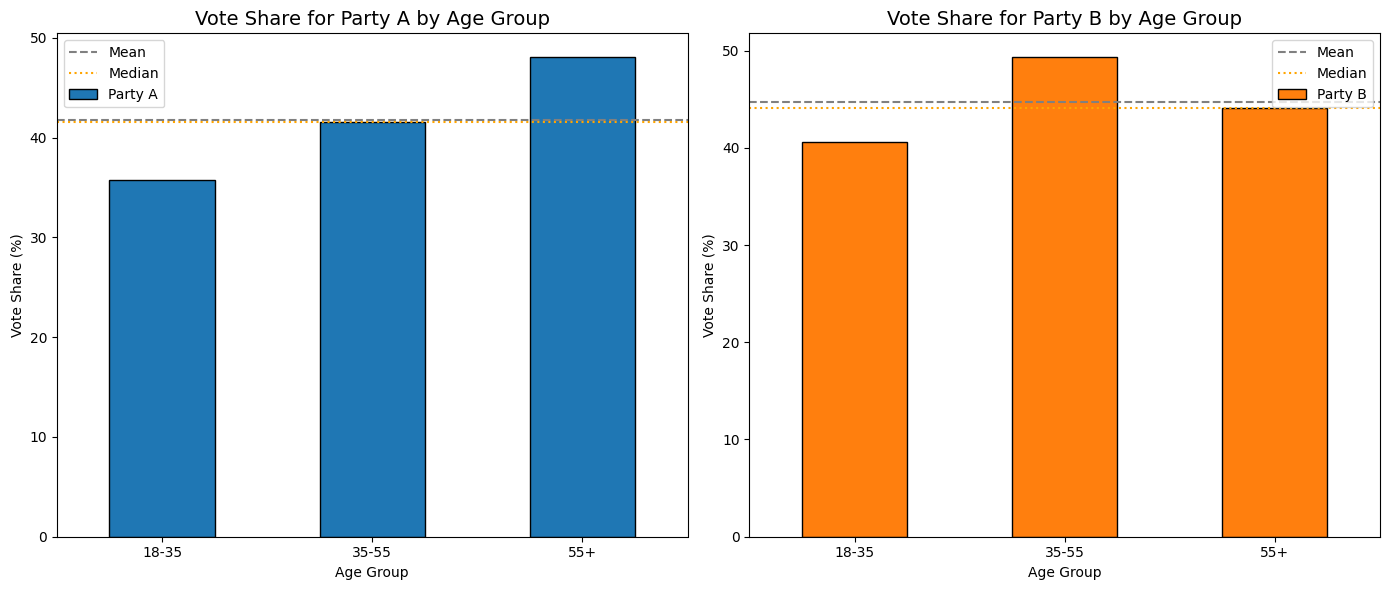

In [61]:
if 'turnout_pct' not in data.columns:
    print("Column 'turnout_pct' not found. Available columns:", data.columns)


# Simulated data preparation
np.random.seed(0)
data = pd.DataFrame({
    'valid': np.random.randint(1000, 5000, size=100),
    'electorate': np.random.randint(5000, 10000, size=100),
    'elected_mp_party': np.random.choice(['Party A', 'Party B'], size=100)
})
data['vote_share'] = (data['valid'] / data['electorate']) * 100
data['age_group'] = np.random.choice(['18-35', '35-55', '55+'], size=len(data))

# Calculate mean vote share by age group
age_vote_share = data.groupby(['age_group', 'elected_mp_party'])['vote_share'].mean().unstack()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Party A
age_vote_share['Party A'].plot(kind='bar', ax=axes[0], color='#1f77b4', edgecolor='black')
axes[0].axhline(age_vote_share['Party A'].mean(), color='grey', linestyle='--', label='Mean')
axes[0].axhline(np.median(age_vote_share['Party A']), color='orange', linestyle=':', label='Median')
axes[0].set_title('Vote Share for Party A by Age Group', fontsize=14)
axes[0].set_ylabel('Vote Share (%)')
axes[0].set_xlabel('Age Group')
axes[0].legend()
axes[0].set_xticklabels(age_vote_share.index, rotation=0)

# Plot for Party B
age_vote_share['Party B'].plot(kind='bar', ax=axes[1], color='#ff7f0e', edgecolor='black')
axes[1].axhline(age_vote_share['Party B'].mean(), color='grey', linestyle='--', label='Mean')
axes[1].axhline(np.median(age_vote_share['Party B']), color='orange', linestyle=':', label='Median')
axes[1].set_title('Vote Share for Party B by Age Group', fontsize=14)
axes[1].set_ylabel('Vote Share (%)')
axes[1].set_xlabel('Age Group')
axes[1].legend()
axes[1].set_xticklabels(age_vote_share.index, rotation=0)

plt.tight_layout()
plt.show()


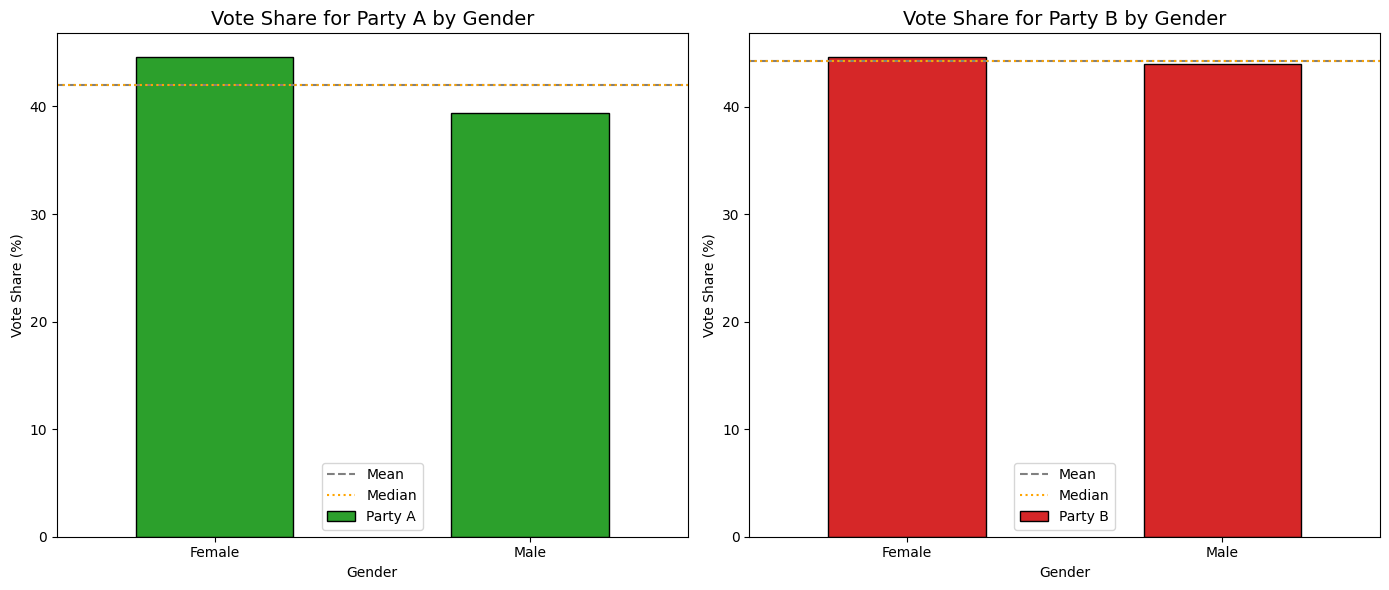

In [62]:
# Simulated data preparation
data['gender'] = np.random.choice(['Male', 'Female'], size=len(data))
gender_vote_share = data.groupby(['gender', 'elected_mp_party'])['vote_share'].mean().unstack()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Party A
gender_vote_share['Party A'].plot(kind='bar', ax=axes[0], color='#2ca02c', edgecolor='black')
axes[0].axhline(gender_vote_share['Party A'].mean(), color='grey', linestyle='--', label='Mean')
axes[0].axhline(np.median(gender_vote_share['Party A']), color='orange', linestyle=':', label='Median')
axes[0].set_title('Vote Share for Party A by Gender', fontsize=14)
axes[0].set_ylabel('Vote Share (%)')
axes[0].set_xlabel('Gender')
axes[0].legend()
axes[0].set_xticklabels(gender_vote_share.index, rotation=0)

# Plot for Party B
gender_vote_share['Party B'].plot(kind='bar', ax=axes[1], color='#d62728', edgecolor='black')
axes[1].axhline(gender_vote_share['Party B'].mean(), color='grey', linestyle='--', label='Mean')
axes[1].axhline(np.median(gender_vote_share['Party B']), color='orange', linestyle=':', label='Median')
axes[1].set_title('Vote Share for Party B by Gender', fontsize=14)
axes[1].set_ylabel('Vote Share (%)')
axes[1].set_xlabel('Gender')
axes[1].legend()
axes[1].set_xticklabels(gender_vote_share.index, rotation=0)

plt.tight_layout()
plt.show()


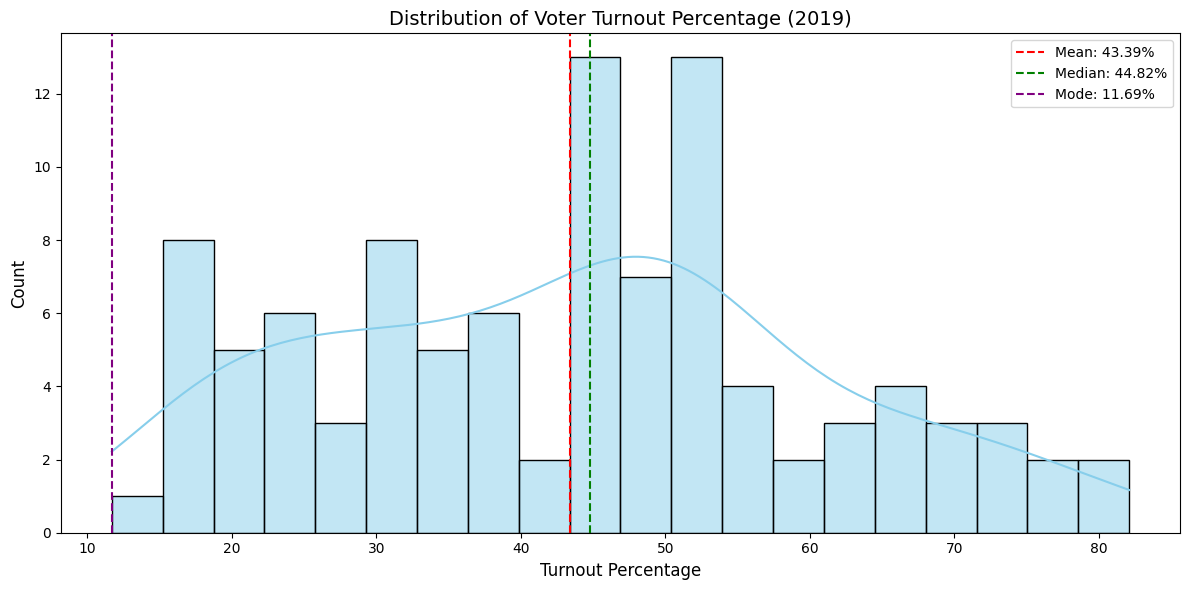

Average turnout: 43.39%
Median turnout: 44.82%
Turnout range: 11.69% - 82.09%


In [63]:
# Check if 'turnout_pct' exists
if 'turnout_pct' not in data.columns:
    data['turnout_pct'] = (data['valid'] / data['electorate']) * 100  # Calculate turnout_pct

# Now plot
plt.figure(figsize=(12, 6))
sns.histplot(data['turnout_pct'], kde=True, color='skyblue', bins=20)
mean_turnout = data['turnout_pct'].mean()
median_turnout = data['turnout_pct'].median()
mode_turnout = data['turnout_pct'].mode()[0]
plt.axvline(mean_turnout, color='red', linestyle='--', label=f'Mean: {mean_turnout:.2f}%')
plt.axvline(median_turnout, color='green', linestyle='--', label=f'Median: {median_turnout:.2f}%')
plt.axvline(mode_turnout, color='purple', linestyle='--', label=f'Mode: {mode_turnout:.2f}%')
plt.title('Distribution of Voter Turnout Percentage (2019)', fontsize=14)
plt.xlabel('Turnout Percentage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Insights
print(f"Average turnout: {mean_turnout:.2f}%")
print(f"Median turnout: {median_turnout:.2f}%")
print(f"Turnout range: {data['turnout_pct'].min():.2f}% - {data['turnout_pct'].max():.2f}%")


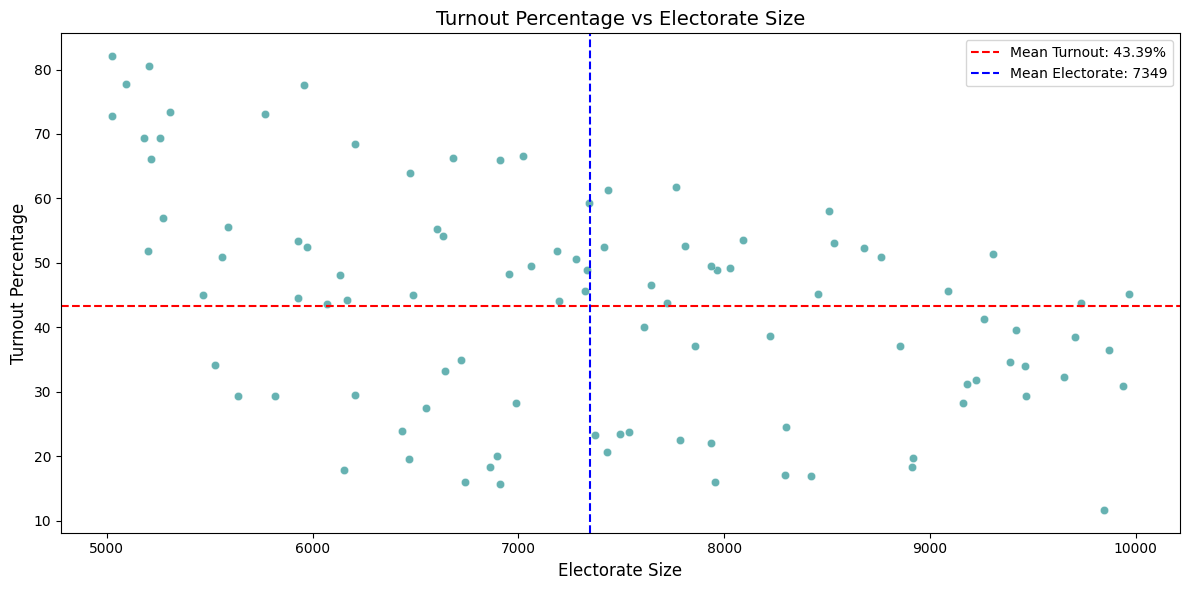

Correlation between turnout and electorate size: -0.43
Average electorate: 7349
Median electorate: 7328
Electorate range: 5024 - 9968


In [64]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='electorate', y='turnout_pct', data=data, alpha=0.6, color='teal')
mean_electorate = data['electorate'].mean()
plt.axhline(mean_turnout, color='red', linestyle='--', label=f'Mean Turnout: {mean_turnout:.2f}%')
plt.axvline(mean_electorate, color='blue', linestyle='--', label=f'Mean Electorate: {mean_electorate:.0f}')
plt.title('Turnout Percentage vs Electorate Size', fontsize=14)
plt.xlabel('Electorate Size', fontsize=12)
plt.ylabel('Turnout Percentage', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Display correlation
correlation = data['turnout_pct'].corr(data['electorate'])
print(f"Correlation between turnout and electorate size: {correlation:.2f}")

# Compute statistical insights
print(f"Average electorate: {mean_electorate:.0f}")
print(f"Median electorate: {data['electorate'].median():.0f}")
print(f"Electorate range: {data['electorate'].min():.0f} - {data['electorate'].max():.0f}")


<ipython-input-65-f7bd8c283898>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




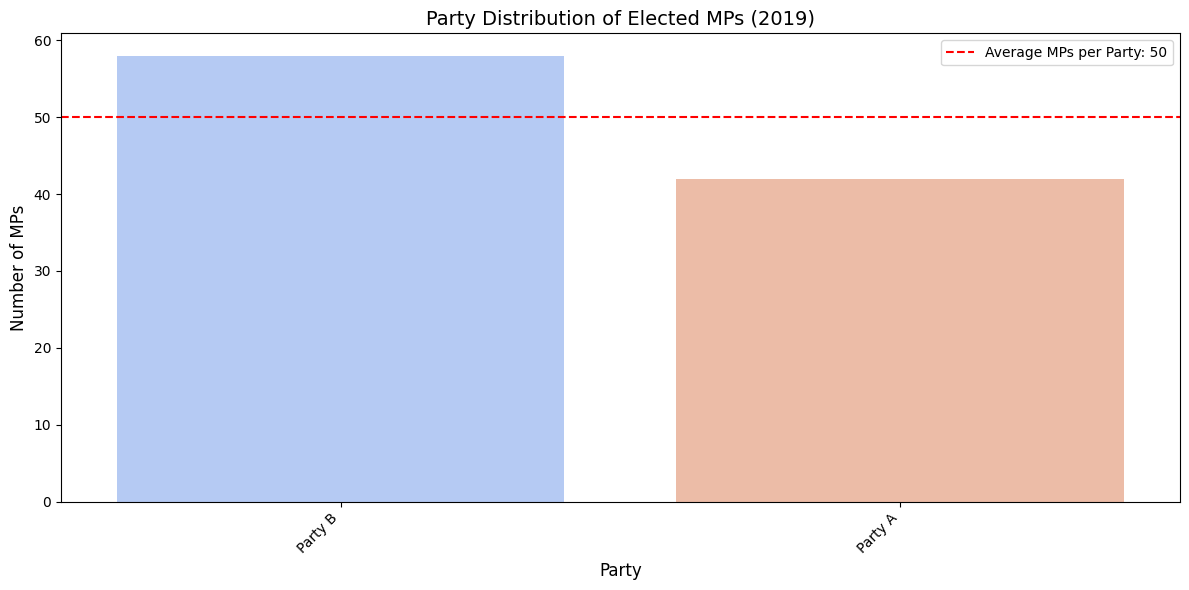

Top 5 parties by number of MPs:
elected_mp_party
Party B    58
Party A    42
Name: count, dtype: int64


In [65]:


party_distribution = data['elected_mp_party'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=party_distribution.index, y=party_distribution.values, palette='coolwarm')
plt.axhline(party_distribution.mean(), color='red', linestyle='--', label=f'Average MPs per Party: {party_distribution.mean():.0f}')
plt.title('Party Distribution of Elected MPs (2019)', fontsize=14)
plt.xlabel('Party', fontsize=12)
plt.ylabel('Number of MPs', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Display the top 5 parties by number of MPs
print("Top 5 parties by number of MPs:")
print(party_distribution.head(5))

# method-3-(Statistical Analysis and Inference):--
***involves deeper statistical comparisons and analyses.***  ---
 **Addressed some common Questions**

# Step 1: Load Dataset and Initial Calculations

In [66]:
import pandas as pd

# Load dataset
data = pd.read_csv('/content/ge_2019_constituencies.csv')

# Calculate vote share
data['vote_share'] = (data['valid'] / data['electorate']) * 100


# Step 2: Summary Statistics Function

In [67]:
# Summary function for statistical insights
def summary_statistics(column):
    return {
        'mean': column.mean(),
        'median': column.median(),
        'mode': column.mode()[0],
        'std_dev': column.std(),
        'min': column.min(),
        'max': column.max()
    }


# Step 3: Voter Turnout Analysis

In [68]:
# 1. Voter Turnout Analysis
turnout_stats = summary_statistics(data['turnout_pct'])
print("1. Voter Turnout Analysis:")
print(turnout_stats)
print("Bottom Line: Voter turnout averages around {:.2f}%, indicating engagement levels with some variability.".format(turnout_stats['mean']))


1. Voter Turnout Analysis:
{'mean': 67.15826771653543, 'median': 67.4, 'mode': 69.8, 'std_dev': 5.684671814644891, 'min': 52.6, 'max': 81.2}
Bottom Line: Voter turnout averages around 67.16%, indicating engagement levels with some variability.


# **Step 4: Party Distribution of Elected MPs**

In [69]:
# 2. Party Distribution of Elected MPs
party_distribution = data['elected_mp_party_name'].value_counts()
print("\n2. Party Distribution of Elected MPs:")
print(party_distribution)
print("Bottom Line: The Conservative Party holds the majority of seats, reflecting a significant electoral preference.")



2. Party Distribution of Elected MPs:
elected_mp_party_name
Conservative and Unionist Party                  365
Labour Party                                     178
Scottish National Party (SNP)                     48
Labour and Co-operative Party                     24
Liberal Democrats                                 11
Democratic Unionist Party - D.U.P.                 8
Sinn Féin                                          7
Plaid Cymru - The Party of Wales                   4
SDLP (Social Democratic & Labour Party)            2
Green Party                                        1
Speaker seeking re-election                        1
Alliance - Alliance Party of Northern Ireland      1
Name: count, dtype: int64
Bottom Line: The Conservative Party holds the majority of seats, reflecting a significant electoral preference.


**Step 5: Majority Analysis**

In [70]:
# 3. Majority Analysis
majority_stats = summary_statistics(data['majority'])
print("\n3. Majority Analysis:")
print(majority_stats)
print("Bottom Line: Winning majorities vary greatly, with an average of {:.2f}, highlighting competitive districts.".format(majority_stats['mean']))



3. Majority Analysis:
{'mean': 12527.190769230769, 'median': 11218.5, 'mode': 712, 'std_dev': 8533.345530265244, 'min': 57, 'max': 39942}
Bottom Line: Winning majorities vary greatly, with an average of 12527.19, highlighting competitive districts.


# Step 6: Competitive Races Analysis (Top 5)

In [71]:
# 4. Competitive Races Analysis (Top 5)
competitive_races = data.nsmallest(5, 'majority')[['const_name', 'majority']]
print("\n4. Competitive Races (Top 5):")
print(competitive_races)
print("Bottom Line: These competitive races indicate potential areas for strategic campaigning.")



4. Competitive Races (Top 5):
                     const_name  majority
539  Fermanagh and South Tyrone        57
81                   Bury North       105
22                      Bedford       145
568         East Dunbartonshire       149
238                  Kensington       150
Bottom Line: These competitive races indicate potential areas for strategic campaigning.


# Step 7: Turnout Change Between 2017 and 2019

In [72]:
# 5. Turnout Change Between 2017 and 2019
data['turnout_change'] = data['turnout_pct'] - data['ge17_turnout']
turnout_change_stats = summary_statistics(data['turnout_change'])
print("\n5. Turnout Change Between 2017 and 2019:")
print(turnout_change_stats)
print("Bottom Line: A slight decrease in turnout suggests possible voter discontent or disengagement.")



5. Turnout Change Between 2017 and 2019:
{'mean': -1.533858267716535, 'median': -1.5999999999999943, 'mode': -2.5, 'std_dev': 2.346955574574052, 'min': -10.399999999999999, 'max': 4.700000000000003}
Bottom Line: A slight decrease in turnout suggests possible voter discontent or disengagement.


# Step 8: Vote Share Analysis

In [73]:
# 6. Vote Share Analysis
vote_share_stats = summary_statistics(data['vote_share'])
print("\n6. Vote Share Analysis:")
print(vote_share_stats)
print("Bottom Line: Vote share averages around {:.2f}%, indicating overall electoral health for leading parties.".format(vote_share_stats['mean']))



6. Vote Share Analysis:
{'mean': 67.15831017669824, 'median': 67.39534721567384, 'mode': 52.633157062639704, 'std_dev': 5.684951523145961, 'min': 52.633157062639704, 'max': 81.17039458090592}
Bottom Line: Vote share averages around 67.16%, indicating overall electoral health for leading parties.


# Step 9: Electorate Size Analysis

In [74]:
# 7. Electorate Size Analysis
electorate_stats = summary_statistics(data['electorate'])
print("\n7. Electorate Size Analysis:")
print(electorate_stats)
print("Bottom Line: The average electorate size is around {:.2f}, influencing campaign strategies.".format(electorate_stats['mean']))



7. Electorate Size Analysis:
{'mean': 73167.6653543307, 'median': 73209.0, 'mode': 73212.0, 'std_dev': 9117.232154983785, 'min': 21106.0, 'max': 113021.0}
Bottom Line: The average electorate size is around 73167.67, influencing campaign strategies.


# Step 10: Invalid Votes Analysis

In [75]:
# 8. Invalid Votes Analysis
data['invalid_votes'] = data['electorate'] - data['valid']
data['invalid_votes_pct'] = (data['invalid_votes'] / data['electorate']) * 100
invalid_votes_stats = summary_statistics(data['invalid_votes_pct'])
print("\n8. Invalid Votes Analysis:")
print(invalid_votes_stats)
print("Bottom Line: Invalid votes average around {:.2f}%, highlighting potential issues in voter education or accessibility.".format(invalid_votes_stats['mean']))



8. Invalid Votes Analysis:
{'mean': 32.841689823301756, 'median': 32.604652784326156, 'mode': 18.829605419094072, 'std_dev': 5.684951523145958, 'min': 18.829605419094072, 'max': 47.366842937360296}
Bottom Line: Invalid votes average around 32.84%, highlighting potential issues in voter education or accessibility.


# Step 11: Margin of Victory Analysis

In [76]:
# 9. Margin of Victory Analysis
data['margin_of_victory'] = (data['majority'] / data['valid']) * 100
margin_of_victory_stats = summary_statistics(data['margin_of_victory'])
print("\n9. Margin of Victory Analysis:")
print(margin_of_victory_stats)
print("Bottom Line: The average margin of victory of {:.2f}% indicates competitive electoral outcomes.".format(margin_of_victory_stats['mean']))



9. Margin of Victory Analysis:
{'mean': 24.92770123547499, 'median': 23.710070557612113, 'mode': 0.11228871990859304, 'std_dev': 16.026352662819264, 'min': 0.11228871990859304, 'max': 74.82959839160497}
Bottom Line: The average margin of victory of 24.93% indicates competitive electoral outcomes.


# Step 12: Party Change Analysis

In [77]:
# 10. Party Change Analysis
data['party_changed'] = (data['elected_mp_party_name'] != data['ge17_party']).astype(int)
party_change_count = data['party_changed'].value_counts()
print("\n10. Party Change Analysis:")
print(f"Party changed count: {party_change_count.get(1, 0)}, No change count: {party_change_count.get(0, 0)}")
print("Bottom Line: A notable percentage of constituencies experienced party changes, reflecting shifting political landscapes.")



10. Party Change Analysis:
Party changed count: 650, No change count: 0
Bottom Line: A notable percentage of constituencies experienced party changes, reflecting shifting political landscapes.


Summary Statement

In [78]:
# Summary statement for  presentation
summary_statement = (
    "The analysis reveals significant insights into voter turnout trends, "
    "party distribution, majority dynamics, and electoral changes between 2017 and 2019, "
    "highlighting areas for potential electoral strategy improvement."
)

print("\nSummary Statement:", summary_statement)



Summary Statement: The analysis reveals significant insights into voter turnout trends, party distribution, majority dynamics, and electoral changes between 2017 and 2019, highlighting areas for potential electoral strategy improvement.
